<p style="text-align: center; font-size: 40px">به نام خدا</p>
<p style="text-align: center; font-size: 30px">فاز دوم تمرین کامپیوتری شماره 5</p>
<p style="text-align: center; font-size: 30px">علی مهرانی - 810198542</p>

In [2]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools

# Section 0
Data loading

In [3]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## showing dataset classes image

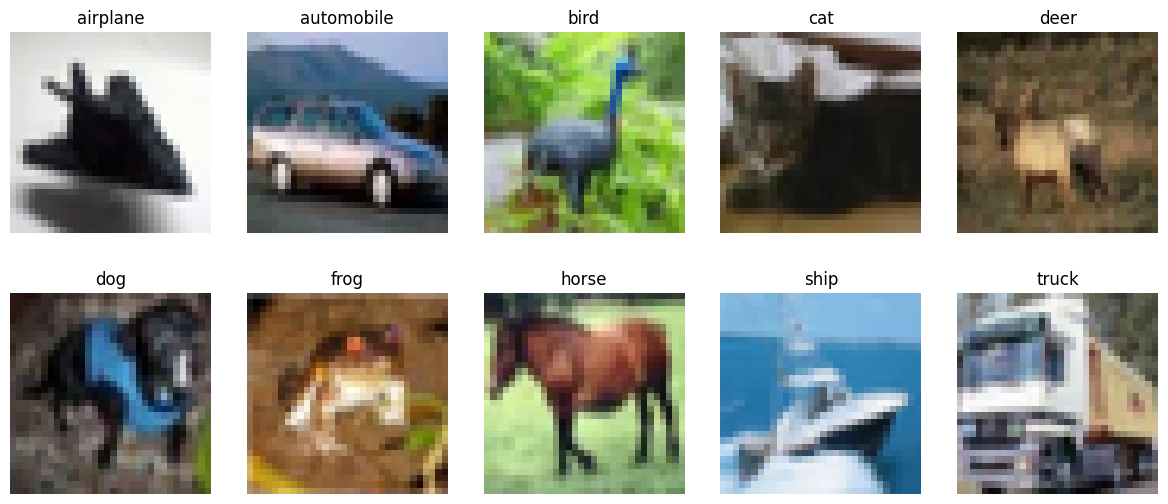

In [4]:
# Define class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plot one image from each class
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.subplots_adjust(hspace=0.3, wspace=0.1)

for i, ax in enumerate(axes.flat):
    # Find the first image of the current class in the training set
    index = np.where(y_train == i)[0][0]
    # Display the image
    ax.imshow(x_train[index])
    ax.set_title(class_names[i])
    ax.axis('off')
    
plt.show()

## Showing test/train data distibution

### train

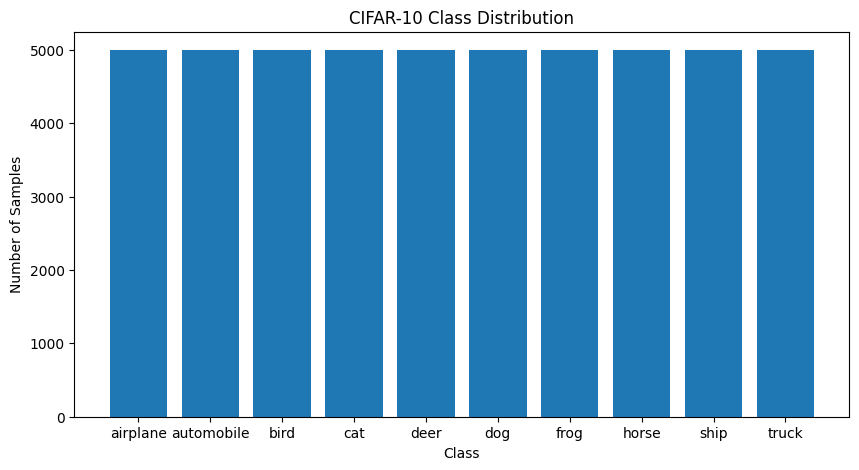

In [5]:
unique_labels, label_counts = np.unique(y_train, return_counts=True)

# Plot the label counts
plt.figure(figsize=(10,5))
plt.bar(unique_labels, label_counts)
plt.xticks(unique_labels, class_names)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('CIFAR-10 Class Distribution')
plt.show()

### test

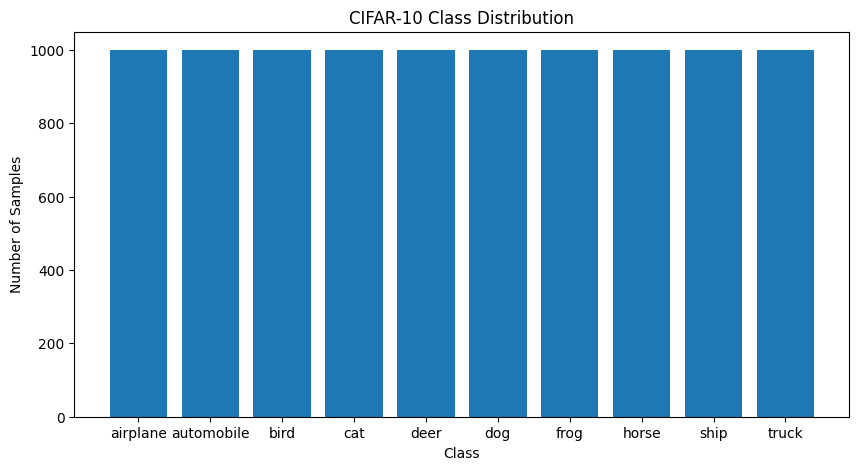

In [6]:
unique_labels, label_counts = np.unique(y_test, return_counts=True)

# Plot the label counts
plt.figure(figsize=(10,5))
plt.bar(unique_labels, label_counts)
plt.xticks(unique_labels, class_names)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('CIFAR-10 Class Distribution')
plt.show()

## Normalization

Since we're giving our images to the CNN, their shape must be matched to what our model expects, so we reshape our iamges to (32 X 32 X 3) RGB images and normalize it's pixel values to be in the range of (0,1). 

In [7]:
x_train=x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)

x_train=x_train / 255.0
x_test=x_test / 255.0

## Label Encoding

We use One Hot encoding here to apply label encoding for 'categorial values'.

In [8]:
classes_num = 10
y_train = tf.keras.utils.to_categorical(y_train, classes_num)
y_test  = tf.keras.utils.to_categorical(y_test , classes_num)

Let's test it.

In [9]:
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

Let's see some images again.

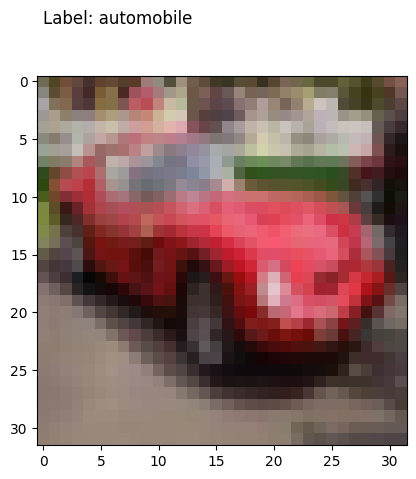

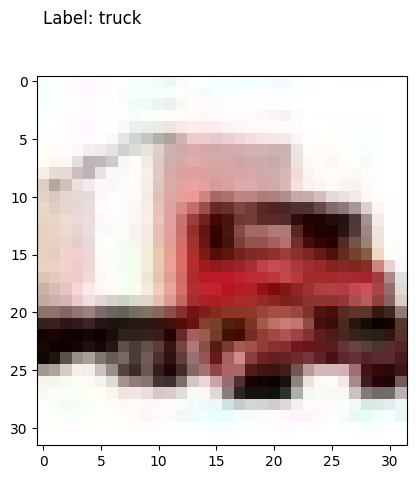

In [10]:
import random
rand_train = random.randint(0, 49999)
rand_test  = random.randint(0, 9999)

plt.imshow(x_train[rand_train])
plt.text(0, -5, f"Label: {class_names[np.argmax(y_train[rand_train])]}", fontsize=12, color="black")
plt.show()

plt.imshow(x_test[rand_test])
plt.text(0, -5, f"Label: {class_names[np.argmax(y_test[rand_test])]}", fontsize=12, color="black")
plt.show()

# Section 1
## Creating CNN

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Activation, Input, Flatten
from tensorflow.keras.optimizers import Adam

In [12]:
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
cnn.add(Activation('relu'))
cnn.add(Conv2D(32, (3, 3)))
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Conv2D(64, (3, 3), padding='same'))
cnn.add(Activation('relu'))
cnn.add(Conv2D(64, (3, 3)))
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Flatten())
cnn.add(Dense(512))
cnn.add(Activation('relu'))
cnn.add(Dense(10))
cnn.add(Activation('softmax'))

cnn.compile(loss = 'categorical_crossentropy',
optimizer = 'adam',
metrics = ['accuracy'])
log = cnn.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_test, y_test))


Epoch 1/20
1563/1563 [==============================] - 20s 6ms/step - loss: 1.3724 - accuracy: 0.5045 - val_loss: 1.0617 - val_accuracy: 0.6220
Epoch 2/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9305 - accuracy: 0.6729 - val_loss: 0.8918 - val_accuracy: 0.6949
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7355 - accuracy: 0.7442 - val_loss: 0.8226 - val_accuracy: 0.7162
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5917 - accuracy: 0.7933 - val_loss: 0.8046 - val_accuracy: 0.7313
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4654 - accuracy: 0.8373 - val_loss: 0.8309 - val_accuracy: 0.7342
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.3494 - accuracy: 0.8773 - val_loss: 0.9512 - val_accuracy: 0.7333
Epoch 7/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.2603 - accuracy: 0.9082 - val_loss: 1.0211 - val_accuracy

## Test data prediction

In [13]:
test_loss, test_accuracy = cnn.evaluate(x_test, y_test) # it's actually done above by setting validation attribute when fitting

313/313 [==============================] - 1s 3ms/step - loss: 1.9831 - accuracy: 0.7300


## Evaluation

Text(0.5, 0, 'Epoch')

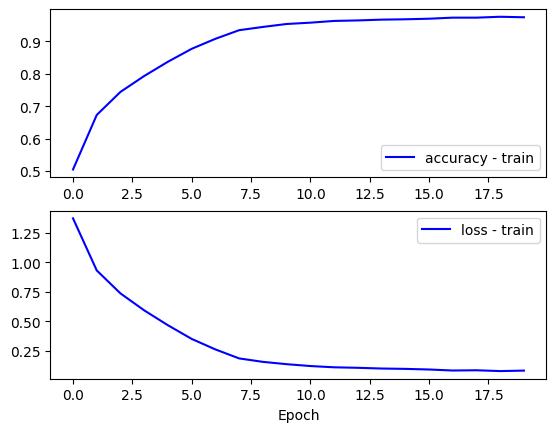

In [14]:
figure, ax = plt.subplots(2,1)

ax[0].plot(log.history['accuracy'], color='b', label="accuracy - train")
legend = ax[0].legend()
# ax[0].set_xlabel('Epoch')

ax[1].plot(log.history['loss'], color='b', label="loss - train")
legend = ax[1].legend()
ax[1].set_xlabel('Epoch')


In [15]:
from sklearn.metrics import classification_report

train_prob = cnn.predict(x_train)
test_prob = cnn.predict(x_test)

train_pred = np.argmax(train_prob, axis=1)
test_pred = np.argmax(test_prob, axis=1)

train_report = classification_report(np.argmax(y_train, axis=1), train_pred)
test_report = classification_report(np.argmax(y_test, axis=1), test_pred)

print("Training data evaluation results : ")
print(train_report)

print("Test data evaluation results : ")
print(test_report)

313/313 [==============================] - 1s 2ms/step
Training data evaluation results : 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      5000
           1       0.99      0.99      0.99      5000
           2       0.98      0.97      0.98      5000
           3       0.97      0.98      0.98      5000
           4       0.98      0.99      0.98      5000
           5       0.98      0.98      0.98      5000
           6       0.99      0.99      0.99      5000
           7       0.99      0.99      0.99      5000
           8       0.99      0.98      0.99      5000
           9       0.99      0.99      0.99      5000

    accuracy                           0.98     50000
   macro avg       0.98      0.98      0.98     50000
weighted avg       0.98      0.98      0.98     50000

Test data evaluation results : 
              precision    recall  f1-score   support

           0       0.79      0.74      0.77      1000
         

## Adam vs SGD

# Section 2

## Deleting 80% of training data for 'plane' and 'car'

5000
5000


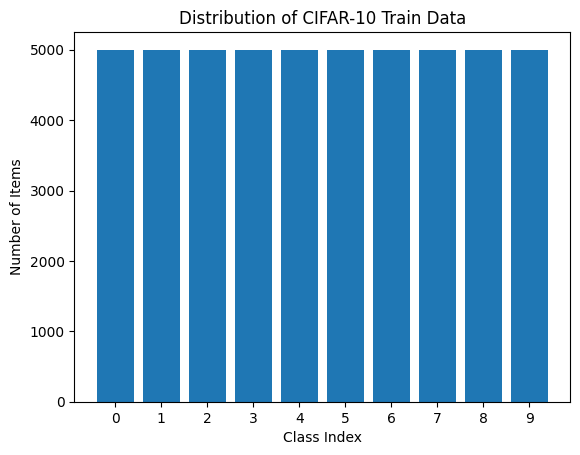

In [69]:
car_indices = np.where(y_train[:, 1] == 1)[0]
airplane_indices = np.where(y_train[:, 0] == 1)[0]

print(len(car_indices))
print(len(airplane_indices))

# Count number of items in each class
class_counts = [0] * 10
for i in range(len(y_train)):
    class_index = tf.argmax(y_train[i]).numpy()
    class_counts[class_index] += 1

# Plot the distribution
plt.bar(range(10), class_counts)
plt.xticks(range(10))
plt.title('Distribution of CIFAR-10 Train Data')
plt.xlabel('Class Index')
plt.ylabel('Number of Items')
plt.show()


In [19]:
# Define the fraction of samples to keep
frac = 0.2

# Filter out the indices of the first and second classes
idx_to_keep = []
for i in range(classes_num):
    idx_class_i = np.where(y_train[:,i]==1)[0]
    if i in [0,1]:
        # Randomly sample 20% of the indices to keep
        n_to_keep = int(frac*len(idx_class_i))
        idx_to_keep.extend(np.random.choice(idx_class_i, size=n_to_keep, replace=False))
    else:
        # Keep all the indices for other classes
        idx_to_keep.extend(idx_class_i)

# Sort the indices to keep and select the corresponding data
idx_to_keep = np.sort(idx_to_keep)
x_train_new = x_train[idx_to_keep]
y_train_new = y_train[idx_to_keep]


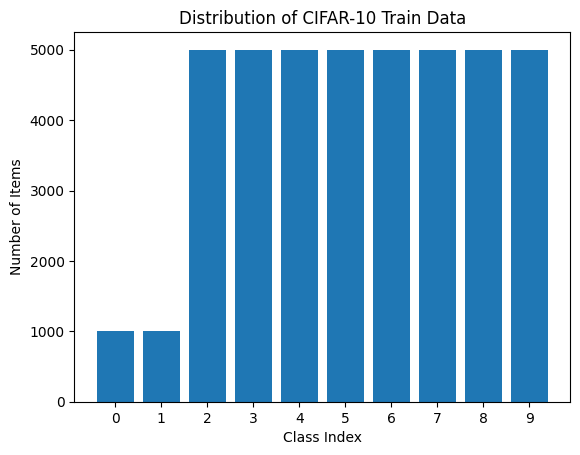

In [20]:
class_counts = [0] * 10
for i in range(len(y_train_new)):
    class_index = tf.argmax(y_train_new[i]).numpy()
    class_counts[class_index] += 1

plt.bar(range(10), class_counts)
plt.xticks(range(10))
plt.title('Distribution of CIFAR-10 Train Data')
plt.xlabel('Class Index')
plt.ylabel('Number of Items')
plt.show()

## Fitting the new data

In [21]:
cnn_del = Sequential()
cnn_del.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train_new.shape[1:]))
cnn_del.add(Activation('relu'))
cnn_del.add(Conv2D(32, (3, 3)))
cnn_del.add(Activation('relu'))
cnn_del.add(MaxPooling2D(pool_size=(2, 2)))

cnn_del.add(Conv2D(64, (3, 3), padding='same'))
cnn_del.add(Activation('relu'))
cnn_del.add(Conv2D(64, (3, 3)))
cnn_del.add(Activation('relu'))
cnn_del.add(MaxPooling2D(pool_size=(2, 2)))

cnn_del.add(Flatten())
cnn_del.add(Dense(512))
cnn_del.add(Activation('relu'))
cnn_del.add(Dense(10))
cnn_del.add(Activation('softmax'))

cnn_del.compile(loss = 'categorical_crossentropy',
optimizer = 'adam',
metrics = ['accuracy'])
log_del = cnn_del.fit(x_train_new, y_train_new, batch_size=32, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
1313/1313 [==============================] - 11s 7ms/step - loss: 1.4135 - accuracy: 0.4890 - val_loss: 1.2320 - val_accuracy: 0.5691
Epoch 2/20
1313/1313 [==============================] - 8s 6ms/step - loss: 0.9695 - accuracy: 0.6574 - val_loss: 1.0678 - val_accuracy: 0.6196
Epoch 3/20
1313/1313 [==============================] - 8s 6ms/step - loss: 0.7545 - accuracy: 0.7353 - val_loss: 0.8761 - val_accuracy: 0.6937
Epoch 4/20
1313/1313 [==============================] - 8s 6ms/step - loss: 0.6017 - accuracy: 0.7895 - val_loss: 0.8938 - val_accuracy: 0.7034
Epoch 5/20
1313/1313 [==============================] - 8s 6ms/step - loss: 0.4656 - accuracy: 0.8380 - val_loss: 0.9683 - val_accuracy: 0.7034
Epoch 6/20
1313/1313 [==============================] - 8s 6ms/step - loss: 0.3412 - accuracy: 0.8810 - val_loss: 1.0814 - val_accuracy: 0.7028
Epoch 7/20
1313/1313 [==============================] - 8s 6ms/step - loss: 0.2468 - accuracy: 0.9134 - val_loss: 1.2343 - val_accuracy

In [23]:
test_loss_del, test_accuracy_del = cnn_del.evaluate(x_test, y_test) 

313/313 [==============================] - 1s 3ms/step - loss: 2.4526 - accuracy: 0.6987


Text(0.5, 0, 'Epoch')

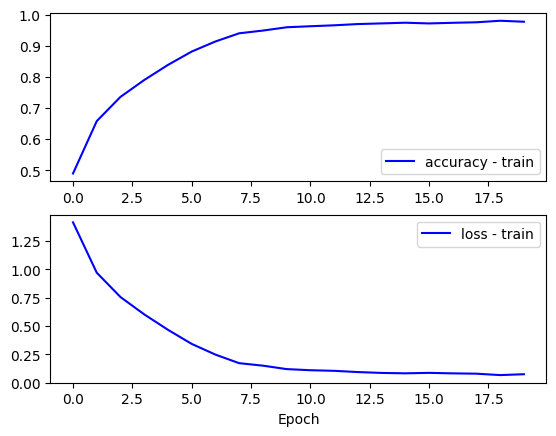

In [24]:
figure, ax = plt.subplots(2,1)

ax[0].plot(log_del.history['accuracy'], color='b', label="accuracy - train")
legend = ax[0].legend()

ax[1].plot(log_del.history['loss'], color='b', label="loss - train")
legend = ax[1].legend()
ax[1].set_xlabel('Epoch')

In [25]:
train_prob_del = cnn_del.predict(x_train_new)
test_prob_del  = cnn_del.predict(x_test)

train_pred_del = np.argmax(train_prob_del, axis=1)
test_pred_del  = np.argmax(test_prob_del, axis=1)

train_report_del = classification_report(np.argmax(y_train_new, axis=1), train_pred_del)
test_report_del  = classification_report(np.argmax(y_test, axis=1), test_pred_del)

print("Training data evaluation results : ")
print(train_report_del)

print("Test data evaluation results : ")
print(test_report_del)

313/313 [==============================] - 1s 2ms/step
Training data evaluation results : 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1000
           1       0.99      0.91      0.95      1000
           2       0.99      0.97      0.98      5000
           3       0.97      0.98      0.97      5000
           4       0.97      0.99      0.98      5000
           5       0.98      0.98      0.98      5000
           6       0.99      0.98      0.99      5000
           7       0.99      0.99      0.99      5000
           8       0.99      0.99      0.99      5000
           9       0.98      0.99      0.98      5000

    accuracy                           0.98     42000
   macro avg       0.98      0.98      0.98     42000
weighted avg       0.98      0.98      0.98     42000

Test data evaluation results : 
              precision    recall  f1-score   support

           0       0.82      0.56      0.67      1000
         

It can be seen that the recall and f-1 score of the first and second classes (0, 1) has been decreased by a large value !    
If the number of samples in a class in the training data decreases significantly, it means that the model has less information to learn from for that specific class. This can result in the model being less capable of recognizing instances of that class during testing, leading to a decrease in recall score.

Additionally, if the number of tests becomes more than the number of training data, this can lead to overfitting and poor generalization performance, since the model may not have seen enough examples during training to accurately capture the underlying patterns in the data.

Overall, having a small number of samples in a class can make it difficult for the model to generalize well to new, unseen examples, which can negatively impact the recall score.